In [1]:
import regex as re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Adjust/Create Features

In [4]:
def sex_to_bool(x):
    if x == "male":
        x = 1
    elif x == "female":
        x = 0
    else:
        x = 2
    return x

In [5]:
train["SexBool"] = train.Sex.apply(sex_to_bool)
del(train["Sex"])
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBool
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
def extract_surname(x):
    surname = x.split(",")[0]
    return surname

train["Surname"] = train["Name"].apply(extract_surname)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBool,Surname
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,Futrelle
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,Allen


In [7]:
train['FamilyMembers'] = train["Parch"] + train["SibSp"] + 1
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBool,Surname,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,Cumings,2
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Heikkinen,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,Futrelle,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,Allen,1


## Fix NA's 
### Cabin

In [8]:
train.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
SexBool            0
Surname            0
FamilyMembers      0
dtype: int64

In [9]:
# Delete people with cabin who didn't pay??
# indexes 263 - 815 - 806

In [10]:
def extract_deck( x ):
    deck_to_int = { "A" : 1, "B" : 2, "C" : 3, "D" : 4, "E" : 5, "F" : 6, "G" : 7, "T" : 8, "N" : 0}
    return deck_to_int[x[0]]

In [11]:
def extract_room( x ):
    try:
        room = re.findall('\d+', x )
        return int(room[0])
    except:
        return(0)

In [12]:
train["Cabin"] = train["Cabin"].fillna("N")
train["Deck"] = train["Cabin"].apply(extract_deck)
train["Room"] = train["Cabin"].apply(extract_room)
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBool,Surname,FamilyMembers,Deck,Room
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,N,S,1,Braund,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,Cumings,2,3,85
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,N,S,0,Heikkinen,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,Futrelle,2,3,123
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,N,S,1,Allen,1,0,0


### Age

## See Correlation

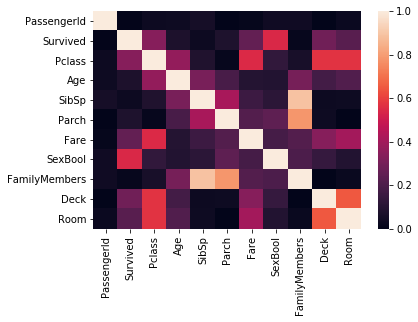

In [13]:
corr = train.corr().abs()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [14]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,SexBool,FamilyMembers,Deck,Room
PassengerId,1.000000,0.005007,0.035144,0.036847,0.057527,0.001652,0.012658,0.042939,0.040143,0.000483,0.028970
Survived,0.005007,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307,0.543351,0.016639,0.287944,0.229756
Pclass,0.035144,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500,0.131900,0.065997,0.570691,0.573302
Age,0.036847,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067,0.093254,0.301914,0.179643,0.213727
SibSp,0.057527,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651,0.114631,0.890712,0.031973,0.038740
Parch,0.001652,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225,0.245489,0.783111,0.037621,0.001640
Fare,0.012658,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.217138,0.337525,0.405619
SexBool,0.042939,0.543351,0.131900,0.093254,0.114631,0.245489,0.182333,1.000000,0.200988,0.143517,0.091734
FamilyMembers,0.040143,0.016639,0.065997,0.301914,0.890712,0.783111,0.217138,0.200988,1.000000,0.003057,0.025658
Deck,0.000483,0.287944,0.570691,0.179643,0.031973,0.037621,0.337525,0.143517,0.003057,1.000000,0.650942


In [15]:
corr.unstack()["Survived"].sort_values(ascending = False)

Survived         1.000000
SexBool          0.543351
Pclass           0.338481
Deck             0.287944
Fare             0.257307
Room             0.229756
Parch            0.081629
Age              0.077221
SibSp            0.035322
FamilyMembers    0.016639
PassengerId      0.005007
dtype: float64